In [2]:
rm(list=ls())

In [3]:
library(ggplot2)
library(data.table)

In [4]:
eigenval=read.table("/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/mpileup/individual_bams/pca/ref_pcs.eigenval",header=FALSE,sep='\t')

In [5]:
eigenval$V1=eigenval$V1/sum(eigenval$V1)
eigenval$V2=seq(1,5)

In [8]:
svg("scree_plog.svg",width=5,height=5)
print(ggplot(data=eigenval,aes(x=eigenval$V2,
                        y=eigenval$V1))+
geom_bar(stat='identity')+
xlab("PC")+
ylab("Percent Variance Explained")+
theme_bw(20))
dev.off() 


Warning message:
“Use of `eigenval$V2` is discouraged. Use `V2` instead.”
Warning message:
“Use of `eigenval$V1` is discouraged. Use `V1` instead.”


png 
  2

In [13]:
#just ADPD
#data=read.table("/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/mpileup/individual_bams/pca/adpd.merged.pca.formatted.csv",header=TRUE,sep='\t')

#ADPD & Phase3 of 1000 Genomes
data=read.table("/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/mpileup/individual_bams/pca/adpd.1kg.merged.common.pca.eigenvec.with.ancestry",header=TRUE,sep='\t')

In [14]:
head(data)

,FID,Disease,BrainRegion,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,GeoRegion
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,AD,ADAD,CAUD,ADAD_CAUD_00_0281,0.135447,-0.219494,-0.0898507,-0.0328576,0.01975480,0.05189400,-0.01948680,0.02704410,-0.05619730,0.0147027,ADPD,ADPD
2,AD,ADAD,CAUD,ADAD_CAUD_00_0387,0.143923,-0.195740,-0.0553496,-0.0522701,0.02150580,-0.02688920,-0.03796900,0.03288520,-0.02703460,-0.0557067,ADPD,ADPD
3,AD,ADAD,CAUD,ADAD_CAUD_01_0164,0.157214,-0.215804,-0.0564061,-0.0481984,0.00537687,0.05355770,-0.03377850,0.06032300,0.00226598,-0.0779854,ADPD,ADPD
4,AD,ADAD,CAUD,ADAD_CAUD_01_1400,0.146686,-0.194132,-0.0741950,-0.0549804,-0.00261584,0.00674527,0.01099180,0.00422842,0.01391480,-0.0105225,ADPD,ADPD
5,AD,ADAD,CAUD,ADAD_CAUD_06_0194,0.142990,-0.232803,-0.0474087,-0.0599938,0.02224690,0.05242860,-0.07060970,0.03994130,-0.04844350,-0.0632223,ADPD,ADPD
6,AD,ADAD,CAUD,ADAD_CAUD_06_1486,0.149170,-0.233312,-0.0787364,-0.0759248,0.03174860,0.01874100,-0.00745377,0.00968102,-0.02670920,-0.0666940,ADPD,ADPD


In [15]:
eigenval

V1,V2
<dbl>,<int>
0.540479901,1
0.265452134,2
0.072545389,3
0.055261177,4
0.012781500,5
0.011289542,1
0.011069733,2
0.010908430,3
0.010613233,4


In [16]:
#you need to multiply or divide the PCs by a multiple of sqrt(eigenvalue) to put them on the same scale.
data$PC1[data$Ancestry=="ADPD"]=data$PC1[data$Ancestry=="ADPD"]/(-1*sqrt(237.231))
data$PC2[data$Ancestry=="ADPD"]=data$PC2[data$Ancestry=="ADPD"]/(-1*sqrt(116.514))
data$PC3[data$Ancestry=="ADPD"]=data$PC3[data$Ancestry=="ADPD"]/(-1*sqrt(31.8421))
data$PC4[data$Ancestry=="ADPD"]=data$PC4[data$Ancestry=="ADPD"]/(-1*sqrt(24.2556))
data$PC5[data$Ancestry=="ADPD"]=data$PC5[data$Ancestry=="ADPD"]/(-1*sqrt(5.61014))

Warning message:
“Use of `data$PC1` is discouraged. Use `PC1` instead.”
Warning message:
“Use of `data$PC2` is discouraged. Use `PC2` instead.”
Warning message:
“Use of `data$FID` is discouraged. Use `FID` instead.”


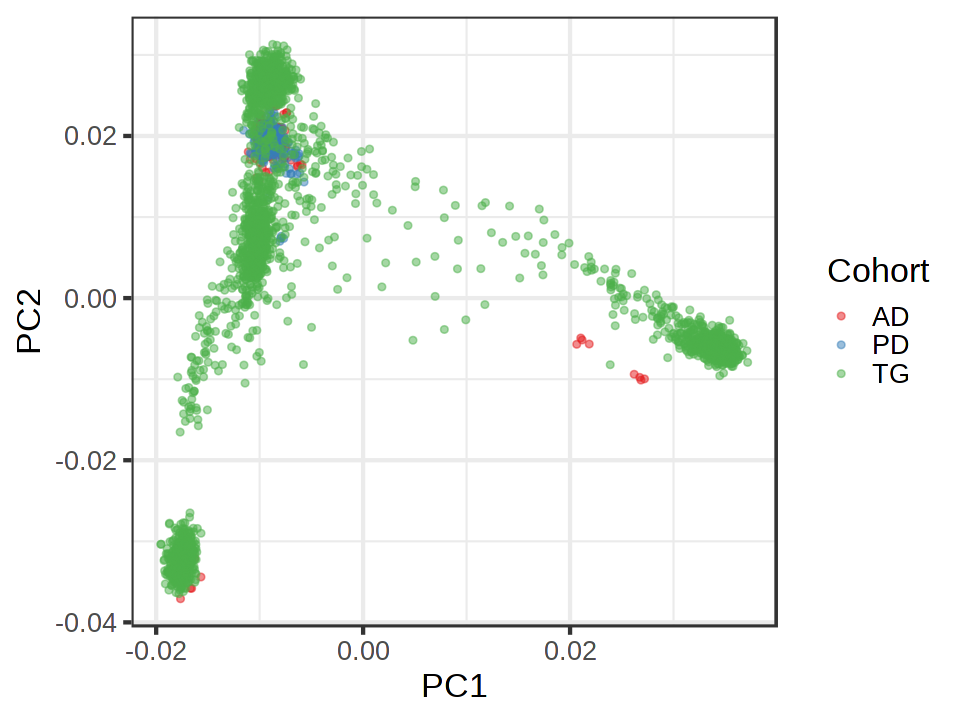

In [17]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(data=data,
      aes(x=data$PC1,
          y=data$PC2,
          color=data$FID))+
geom_point(alpha=0.5)+
scale_color_manual(name="Cohort",values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999'))+
xlab("PC1")+
ylab("PC2")+
theme_bw(20)


Warning message:
“Use of `data$PC1` is discouraged. Use `PC1` instead.”
Warning message:
“Use of `data$PC2` is discouraged. Use `PC2` instead.”
Warning message:
“Use of `data$GeoRegion` is discouraged. Use `GeoRegion` instead.”


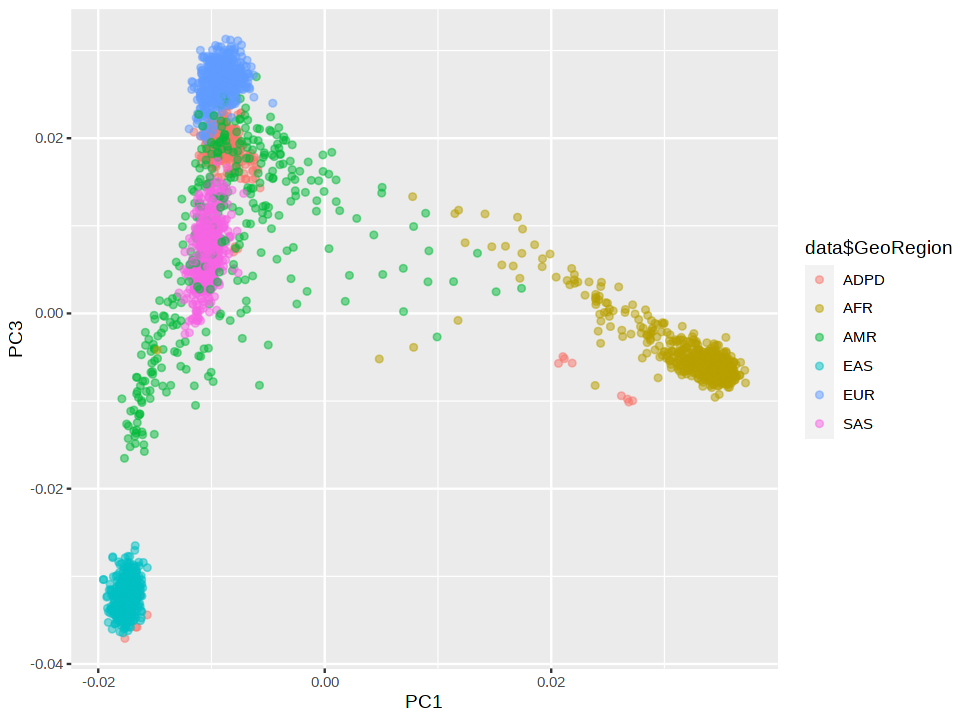

In [18]:
ggplot(data=data,
      aes(x=data$PC1,
          y=data$PC2,
          color=data$GeoRegion))+
geom_point(alpha=0.5)+
xlab("PC1")+
ylab("PC3")



Warning message:
“Use of `data$PC1` is discouraged. Use `PC1` instead.”
Warning message:
“Use of `data$PC2` is discouraged. Use `PC2` instead.”
Warning message:
“Use of `data$GeoRegion` is discouraged. Use `GeoRegion` instead.”
Warning message:
“Use of `data$PC1` is discouraged. Use `PC1` instead.”
Warning message:
“Use of `data$PC2` is discouraged. Use `PC2` instead.”
Warning message:
“Use of `data$GeoRegion` is discouraged. Use `GeoRegion` instead.”


png 
  2

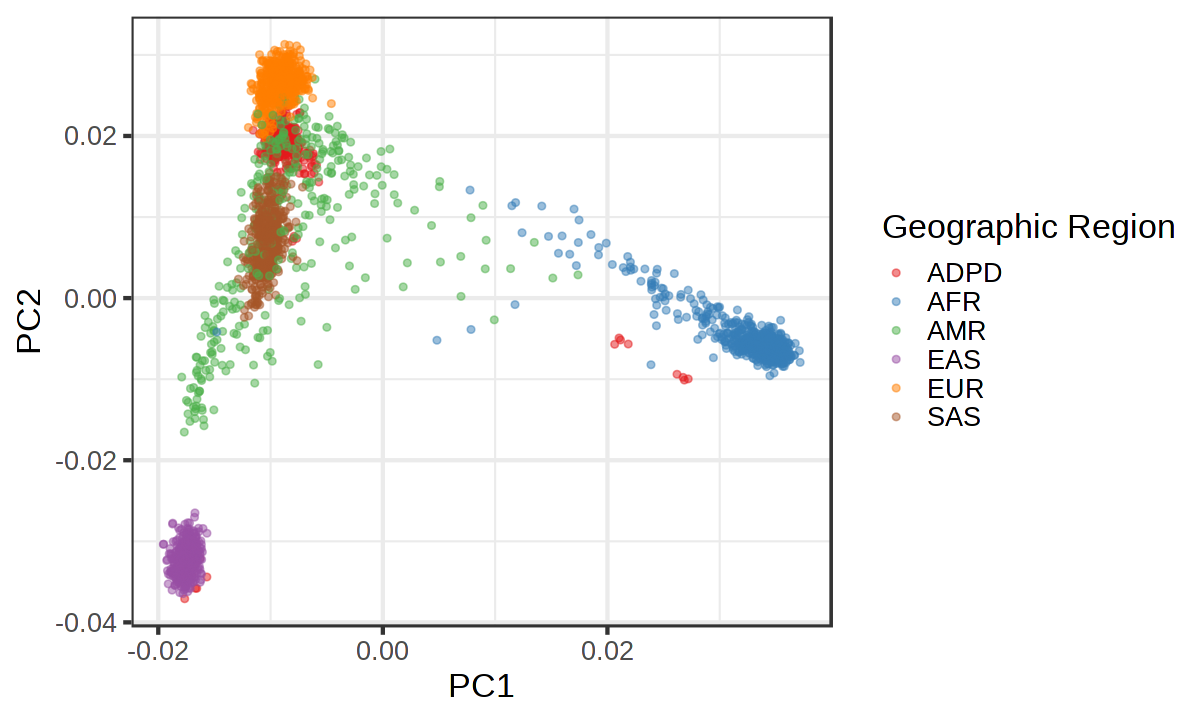

In [23]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data=data,
      aes(x=data$PC1,
          y=data$PC2,
          color=data$GeoRegion))+
geom_point(alpha=0.5)+
scale_color_manual(name="Geographic Region",values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999'))+
xlab("PC1")+
ylab("PC2")+
theme_bw(20)

svg("PC1.PC2.ancestry.svg",height=6,width=10)
print(ggplot(data=data,
      aes(x=data$PC1,
          y=data$PC2,
          color=data$GeoRegion))+
geom_point(alpha=0.5)+
scale_color_manual(name="Geographic Region",values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999'))+
xlab("PC1")+
ylab("PC2")+
theme_bw(20))
dev.off()

Warning message:
“Use of `data$PC2` is discouraged. Use `PC2` instead.”
Warning message:
“Use of `data$PC3` is discouraged. Use `PC3` instead.”
Warning message:
“Use of `data$GeoRegion` is discouraged. Use `GeoRegion` instead.”
Warning message:
“Use of `data$PC2` is discouraged. Use `PC2` instead.”
Warning message:
“Use of `data$PC3` is discouraged. Use `PC3` instead.”
Warning message:
“Use of `data$GeoRegion` is discouraged. Use `GeoRegion` instead.”


png 
  2

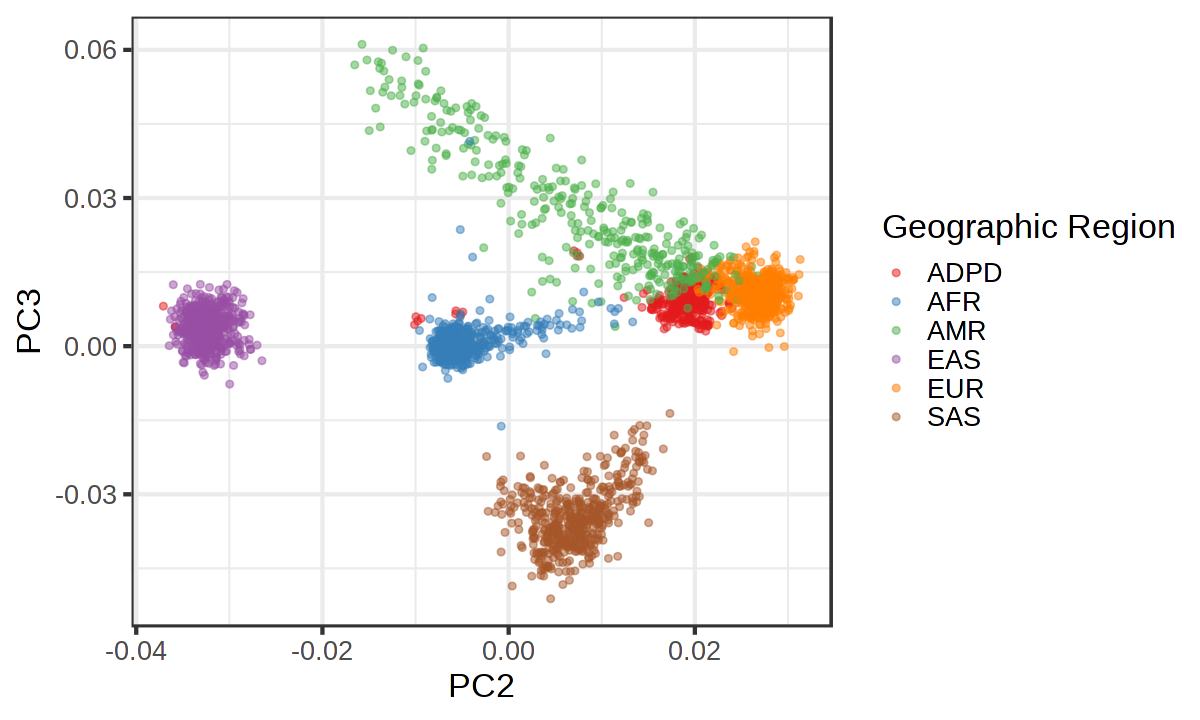

In [24]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data=data,
      aes(x=data$PC2,
          y=data$PC3,
          color=data$GeoRegion))+
geom_point(alpha=0.5)+
scale_color_manual(name="Geographic Region",values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999'))+
xlab("PC2")+
ylab("PC3")+
theme_bw(20)
svg("PC2.PC3.ancestry.svg",height=6,width=10)
print(ggplot(data=data,
      aes(x=data$PC2,
          y=data$PC3,
          color=data$GeoRegion))+
geom_point(alpha=0.5)+
scale_color_manual(name="Geographic Region",values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999'))+
xlab("PC2")+
ylab("PC3")+
theme_bw(20))
dev.off()

Warning message:
“Use of `data$PC1` is discouraged. Use `PC1` instead.”
Warning message:
“Use of `data$PC3` is discouraged. Use `PC3` instead.”
Warning message:
“Use of `data$GeoRegion` is discouraged. Use `GeoRegion` instead.”
Warning message:
“Use of `data$PC1` is discouraged. Use `PC1` instead.”
Warning message:
“Use of `data$PC3` is discouraged. Use `PC3` instead.”
Warning message:
“Use of `data$GeoRegion` is discouraged. Use `GeoRegion` instead.”


png 
  2

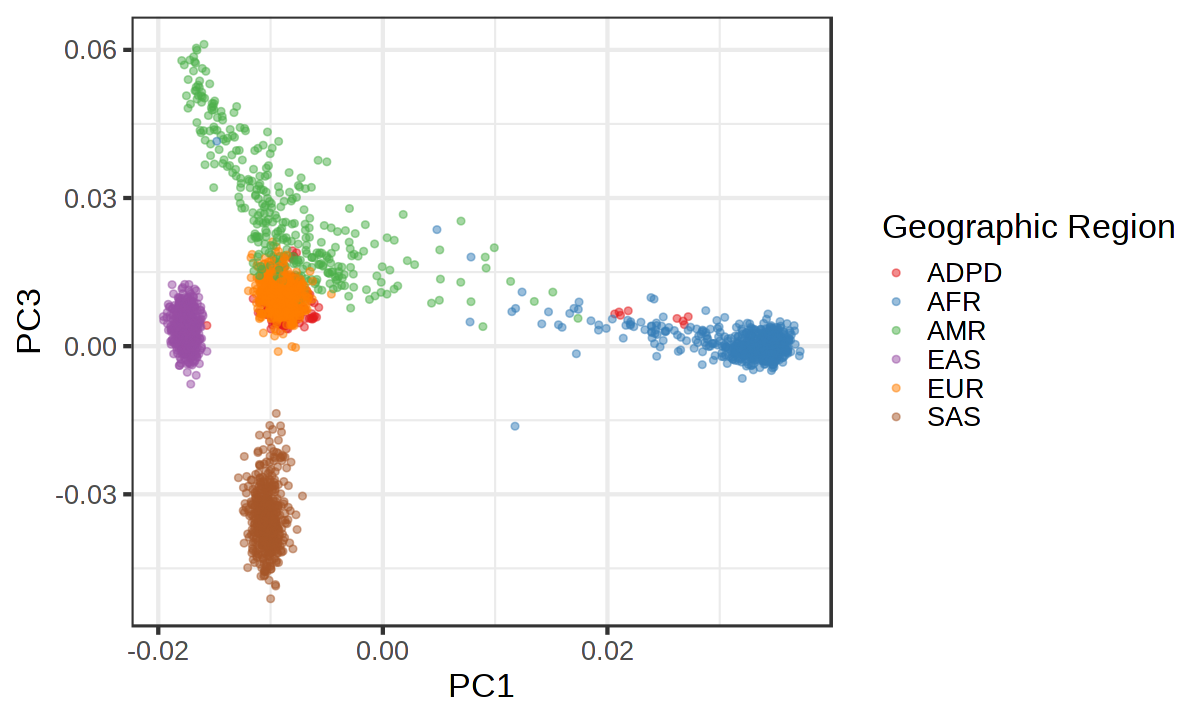

In [26]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data=data,
      aes(x=data$PC1,
          y=data$PC3,
          color=data$GeoRegion))+
geom_point(alpha=0.5)+
scale_color_manual(name="Geographic Region",values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999'))+
xlab("PC1")+
ylab("PC3")+
theme_bw(20)

svg("PC1.PC3.ancestry.svg",height=6,width=10)
print(ggplot(data=data,
      aes(x=data$PC1,
          y=data$PC3,
          color=data$GeoRegion))+
geom_point(alpha=0.5)+
scale_color_manual(name="Geographic Region",values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999'))+
xlab("PC1")+
ylab("PC3")+
theme_bw(20)
)
dev.off()

Warning message:
“Use of `data$PC3` is discouraged. Use `PC3` instead.”
Warning message:
“Use of `data$PC4` is discouraged. Use `PC4` instead.”
Warning message:
“Use of `data$GeoRegion` is discouraged. Use `GeoRegion` instead.”


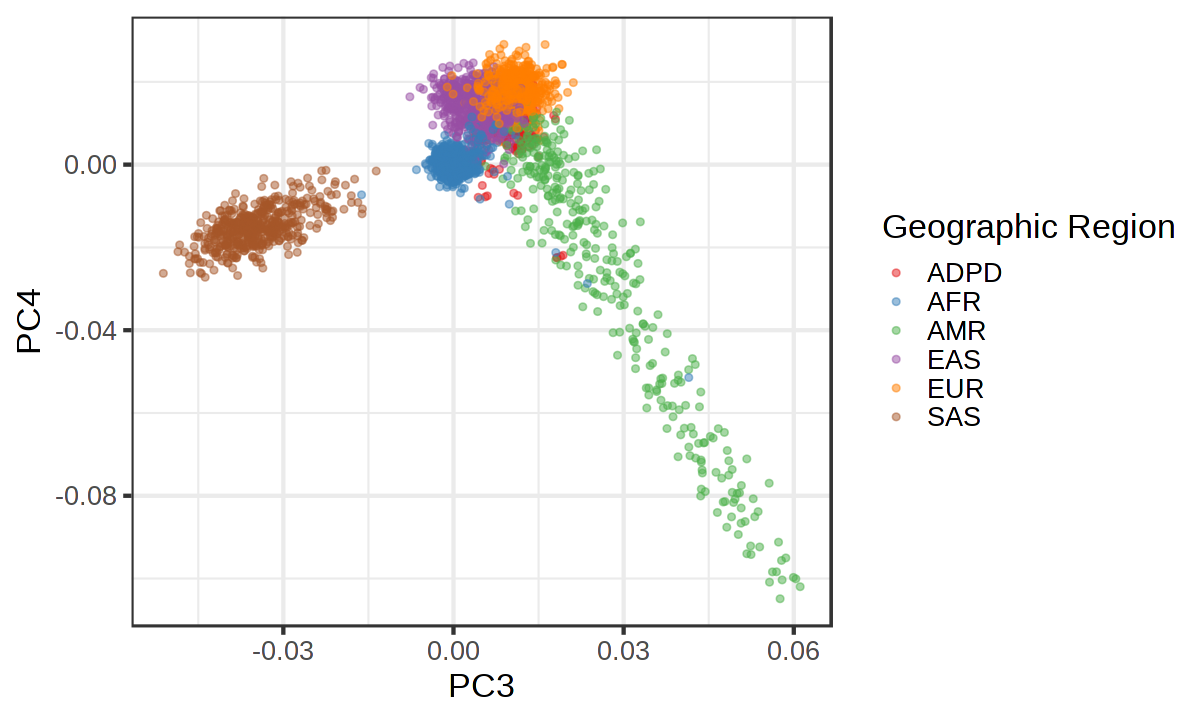

In [14]:
options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(data=data,
      aes(x=data$PC3,
          y=data$PC4,
          color=data$GeoRegion))+
geom_point(alpha=0.5)+
scale_color_manual(name="Geographic Region",values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999'))+
xlab("PC3")+
ylab("PC4")+
theme_bw(20)

In [15]:
min_pc2=min(data$PC2)
max_pc2=max(data$PC2)
min_pc3=min(data$PC3)
max_pc3=max(data$PC3)

In [16]:
subset=data[data$GeoRegion=="ADPD",]
head(subset)

,FID,Disease,BrainRegion,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,GeoRegion
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,AD,ADAD,CAUD,ADAD_CAUD_00_0281,-0.008793943,0.02033450,0.015922843,0.006671597,-0.008340379,0.05189400,-0.01948680,0.02704410,-0.05619730,0.0147027,ADPD,ADPD
2,AD,ADAD,CAUD,ADAD_CAUD_00_0387,-0.009344251,0.01813387,0.009808749,0.010613224,-0.009079643,-0.02688920,-0.03796900,0.03288520,-0.02703460,-0.0557067,ADPD,ADPD
3,AD,ADAD,CAUD,ADAD_CAUD_01_0164,-0.010207174,0.01999265,0.009995976,0.009786482,-0.002270088,0.05355770,-0.03377850,0.06032300,0.00226598,-0.0779854,ADPD,ADPD
4,AD,ADAD,CAUD,ADAD_CAUD_01_1400,-0.009523639,0.01798490,0.013148427,0.011163539,0.001104395,0.00674527,0.01099180,0.00422842,0.01391480,-0.0105225,ADPD,ADPD
5,AD,ADAD,CAUD,ADAD_CAUD_06_0194,-0.009283675,0.02156749,0.008401507,0.012181489,-0.009392531,0.05242860,-0.07060970,0.03994130,-0.04844350,-0.0632223,ADPD,ADPD
6,AD,ADAD,CAUD,ADAD_CAUD_06_1486,-0.009684914,0.02161464,0.013953228,0.015416211,-0.013404102,0.01874100,-0.00745377,0.00968102,-0.02670920,-0.0666940,ADPD,ADPD


In [17]:
##order by PC1 to resolve ancestry 
pc2_adpd=subset[order(subset$PC2),]

In [18]:
head(pc2_adpd,n=15)

,FID,Disease,BrainRegion,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,GeoRegion
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
39,AD,ADAD,SMTG,ADAD_SMTG_23710xx,-0.01764703,-0.037086426,0.008102440,-0.0011184818,-0.055133609,0.01471080,1.85467e-03,0.01775620,-0.013213000,-0.0273635,ADPD,ADPD
29,AD,ADAD,PARL,ADAD_PARL_WYYIWGx,-0.01657323,-0.035802121,0.003849559,0.0060139523,-0.047942360,0.01702580,-2.54855e-05,-0.00311275,-0.013299200,-0.0246896,ADPD,ADPD
46,AD,ADAD,SMTG,ADAD_SMTG_WYYIWGx,-0.01668763,-0.035798137,0.003865030,0.0068113741,-0.046206716,0.01246020,-2.32339e-03,-0.00499233,-0.012119500,-0.0263323,ADPD,ADPD
16,AD,ADAD,CAUD,ADAD_CAUD_WYYIWGx,-0.01567259,-0.034400993,0.004189367,0.0055838811,-0.045191760,0.01666040,1.13563e-03,-0.00600001,-0.008555330,-0.0236068,ADPD,ADPD
48,AD,CTRH,CAUD,CTRH_CAUD_07_1144,-0.01730572,-0.034155583,0.004358235,-0.0002378539,-0.062025943,0.06084140,-3.58649e-02,-0.01042470,-0.018914100,0.0328322,ADPD,ADPD
20,AD,ADAD,PARL,ADAD_PARL_02_0621,-0.01711179,-0.034136221,0.002831586,0.0025555343,-0.040110093,0.03463120,-1.66426e-02,-0.03399970,0.044156400,-0.0104349,ADPD,ADPD
33,AD,ADAD,SMTG,ADAD_SMTG_02_0621,-0.01702089,-0.034076651,0.003723435,0.0022417067,-0.041564302,0.02788310,-2.04556e-02,-0.03772990,0.047103100,-0.0112163,ADPD,ADPD
59,AD,CTRH,HIPP,CTRH_HIPP_07_1144,-0.01748920,-0.033678381,0.004310458,0.0020850975,-0.061152844,0.05291440,-3.50026e-02,-0.00225579,-0.014134200,0.0350038,ADPD,ADPD
81,AD,CTRH,SMTG,CTRH_SMTG_07_1144,-0.01665627,-0.032366005,0.004877137,0.0006936166,-0.058023112,0.05095800,-3.09123e-02,-0.01766610,-0.016079300,0.0410055,ADPD,ADPD


In [19]:
tail(pc2_adpd,n=12)

,FID,Disease,BrainRegion,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,GeoRegion
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
54,AD,CTRH,CAUD,CTRH_CAUD_14_0513,-0.009848136,0.02266373,0.012828767,0.013983357,-0.0173238034,0.016821200,0.011037100,0.07026110,0.00570881,-0.051964100,ADPD,ADPD
180,AD,LOAD,SMTG,LOAD_SMTG_12_1181,-0.007679110,0.02266947,0.006735496,0.009276594,-0.0130286441,0.059107300,-0.004064630,0.00547279,-0.01327680,-0.080200100,ADPD,ADPD
328,PD,LOPD,CAUD,LOPD_CAUD_11_70,-0.009198493,0.02271459,0.012202208,0.019191056,-0.0051369740,0.004267930,-0.006430700,0.03949830,0.02421470,0.006052020,ADPD,ADPD
388,PD,LOPD,SUNI,LOPD_SUNI_11_70,-0.008904576,0.02279574,0.012649922,0.017776029,-0.0031437320,-0.001496070,-0.005575650,0.04209630,0.02527700,0.000966161,ADPD,ADPD
349,PD,LOPD,MDFG,LOPD_MDFG_11_70,-0.008610140,0.02283771,0.011487555,0.020256417,-0.0063463517,0.000550455,-0.000871202,0.03367670,0.02819660,-0.002201330,ADPD,ADPD
166,AD,LOAD,PARL,LOAD_PARL_12_1181,-0.007399087,0.02286967,0.007057389,0.009792858,-0.0132416837,0.059556700,-0.001918510,0.00712656,-0.01038950,-0.084629400,ADPD,ADPD
149,AD,LOAD,HIPP,LOAD_HIPP_12_1181,-0.007378376,0.02288060,0.006170661,0.010356736,-0.0116244233,0.055174800,-0.003251770,0.00624609,-0.00628401,-0.081444100,ADPD,ADPD
375,PD,LOPD,PTMN,LOPD_PTMN_11_70,-0.009056307,0.02317771,0.011390690,0.019217045,-0.0033704423,0.008872060,-0.009381170,0.04181750,0.01963210,0.005724490,ADPD,ADPD
142,AD,LOAD,HIPP,LOAD_HIPP_09_1166,-0.008402314,0.02365547,0.008688488,0.011300899,-0.0007457274,0.006485550,0.030489400,0.03855470,0.01731400,-0.042967100,ADPD,ADPD


In [20]:
pc3_adpd=subset[order(subset$PC3),]

In [21]:
head(pc3_adpd,n=30)

,FID,Disease,BrainRegion,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,GeoRegion
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
20,AD,ADAD,PARL,ADAD_PARL_02_0621,-0.017111789,-0.03413622,0.002831586,0.0025555343,-0.0401100931,0.03463120,-1.66426e-02,-0.03399970,0.04415640,-0.010434900,ADPD,ADPD
323,PD,GBA1,SUNI,GBA1_SUNI_97_52,-0.009130322,0.02116921,0.003026646,0.0171311560,-0.0024726909,0.04329590,1.14727e-02,0.02368380,-0.02163340,-0.028496300,ADPD,ADPD
267,PD,GBA1,HIPP,GBA1_HIPP_97_52,-0.008449774,0.02064625,0.003449905,0.0173961917,-0.0021504294,0.03893120,1.41357e-02,0.01885230,-0.01812980,-0.024428500,ADPD,ADPD
24,AD,ADAD,PARL,ADAD_PARL_25044xx,-0.009975455,0.01670514,0.003478011,0.0079015675,0.0046600624,0.04511080,-1.71143e-02,0.00350019,-0.00889863,-0.022235800,ADPD,ADPD
296,PD,GBA1,MDTG,GBA1_MDTG_97_52,-0.008570730,0.02041158,0.003539239,0.0187337355,-0.0022259137,0.04188290,1.87947e-02,0.02452930,-0.01755250,-0.021590800,ADPD,ADPD
33,AD,ADAD,SMTG,ADAD_SMTG_02_0621,-0.017020894,-0.03407665,0.003723435,0.0022417067,-0.0415643018,0.02788310,-2.04556e-02,-0.03772990,0.04710310,-0.011216300,ADPD,ADPD
29,AD,ADAD,PARL,ADAD_PARL_WYYIWGx,-0.016573234,-0.03580212,0.003849559,0.0060139523,-0.0479423604,0.01702580,-2.54855e-05,-0.00311275,-0.01329920,-0.024689600,ADPD,ADPD
179,AD,LOAD,SMTG,LOAD_SMTG_11_1475,-0.006985837,0.01699492,0.003857480,0.0136598040,0.0022845313,-0.04746310,-9.44785e-03,0.00932854,-0.00139323,-0.018113700,ADPD,ADPD
46,AD,ADAD,SMTG,ADAD_SMTG_WYYIWGx,-0.016687632,-0.03579814,0.003865030,0.0068113741,-0.0462067165,0.01246020,-2.32339e-03,-0.00499233,-0.01211950,-0.026332300,ADPD,ADPD


In [22]:
tail(pc3_adpd)

,FID,Disease,BrainRegion,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,GeoRegion
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
61,AD,CTRH,HIPP,CTRH_HIPP_08_0298,-0.008091776,0.019426792,0.01766569,0.01189406,-0.008858919,0.0491049,0.00821353,0.00264010,0.008178690,-0.001241430,ADPD,ADPD
72,AD,CTRH,PARL,CTRH_PARL_08_0298,-0.008110409,0.019697679,0.01797947,0.01104937,-0.006895628,0.0478929,0.00185166,-0.00411555,-0.000757668,0.000588935,ADPD,ADPD
246,PD,CTRL,SUNI,CTRL_SUNI_09_50,-0.007972703,0.007356789,0.01822580,-0.02249808,-0.015995451,0.0150329,0.03318370,0.05246710,-0.028932800,0.002126910,ADPD,ADPD
220,PD,CTRL,MDTG,CTRL_MDTG_09_50,-0.007912777,0.007628946,0.01822987,-0.02244407,-0.018170136,0.0122247,0.04196870,0.04238640,-0.031269800,-0.004549070,ADPD,ADPD
232,PD,CTRL,PTMN,CTRL_PTMN_09_50,-0.007681772,0.007360273,0.01891693,-0.02216834,-0.020364157,0.0105078,0.04359460,0.04210670,-0.029356200,-0.003924100,ADPD,ADPD
208,PD,CTRL,MDFG,CTRL_MDFG_09_50,-0.008052431,0.007005822,0.01932488,-0.02189422,-0.017526161,0.0124990,0.04607840,0.03151120,-0.032743600,-0.008258190,ADPD,ADPD


Warning message:
“Use of `subset$PC2` is discouraged. Use `PC2` instead.”
Warning message:
“Use of `subset$PC3` is discouraged. Use `PC3` instead.”
Warning message:
“Use of `subset$Ancestry` is discouraged. Use `Ancestry` instead.”


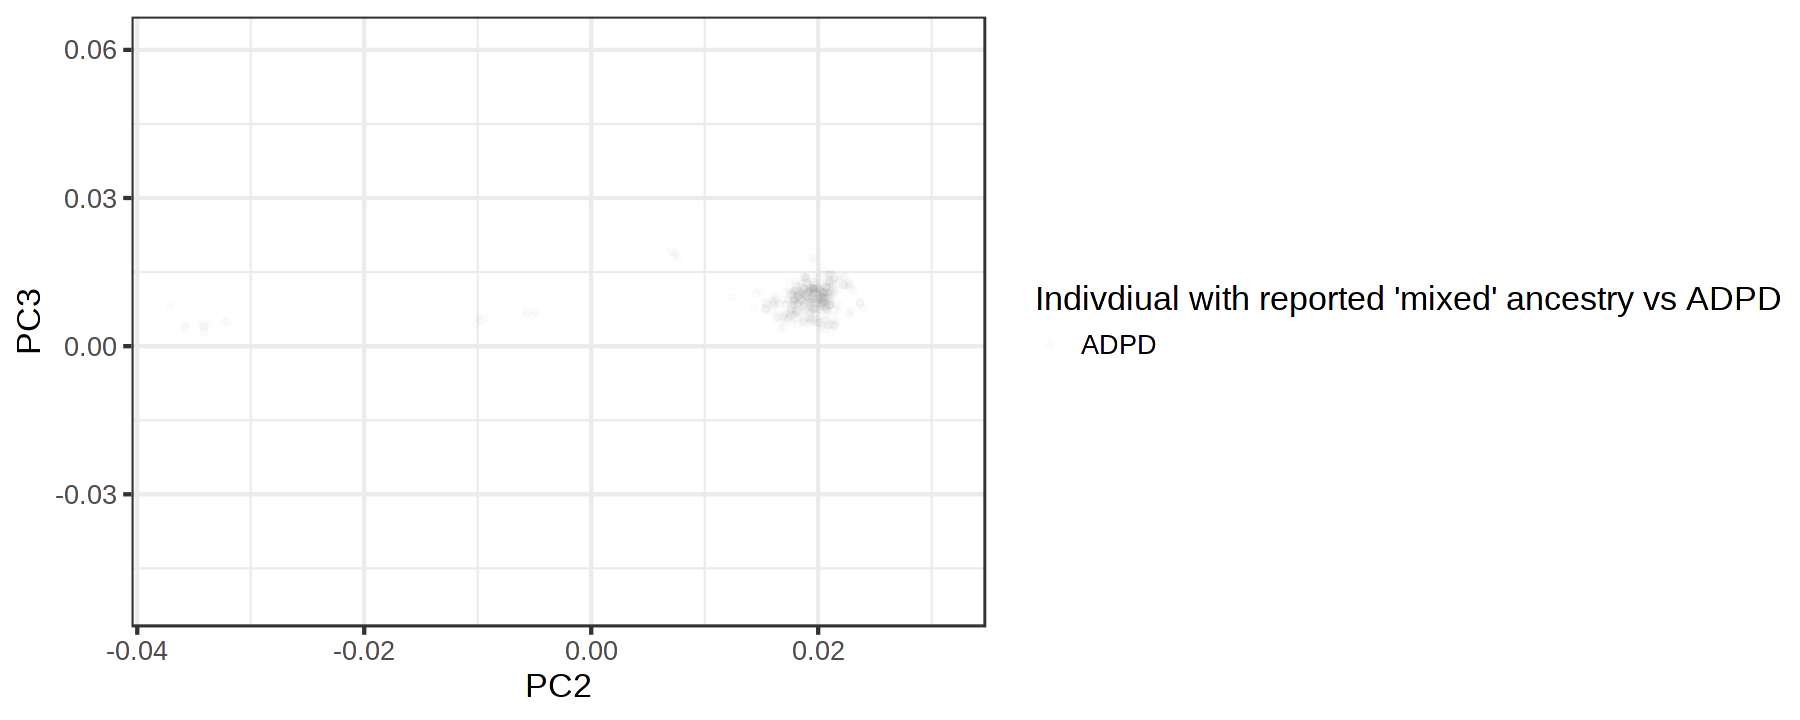

In [23]:
options(repr.plot.width = 15, repr.plot.height = 6)

ggplot(data=subset,
      aes(x=subset$PC2,
          y=subset$PC3,
          alpha=subset$Ancestry))+
geom_point()+
scale_alpha_manual(name="Indivdiual with reported 'mixed' ancestry vs ADPD",values=c(0.01,1))+
xlab("PC2")+
ylab("PC3")+
xlim(c(min_pc2,max_pc2))+
ylim(c(min_pc3,max_pc3))+
theme_bw(20)


Warning message:
“Use of `subset$PC1` is discouraged. Use `PC1` instead.”
Warning message:
“Use of `subset$PC2` is discouraged. Use `PC2` instead.”
Warning message:
“Use of `subset$BrainRegion` is discouraged. Use `BrainRegion` instead.”


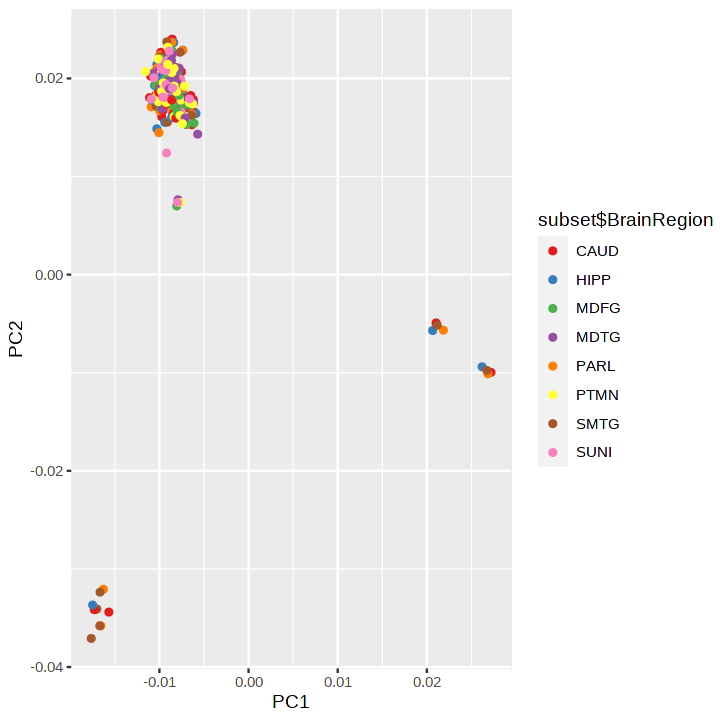

In [24]:
options(repr.plot.width = 6, repr.plot.height = 6)

ggplot(data=subset,
      aes(x=subset$PC1,
          y=subset$PC2,
         color=subset$BrainRegion))+
geom_point()+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999'))+
xlab("PC1")+
ylab("PC2")

Warning message:
“Use of `subset$PC4` is discouraged. Use `PC4` instead.”
Warning message:
“Use of `subset$PC5` is discouraged. Use `PC5` instead.”
Warning message:
“Use of `subset$Disease` is discouraged. Use `Disease` instead.”


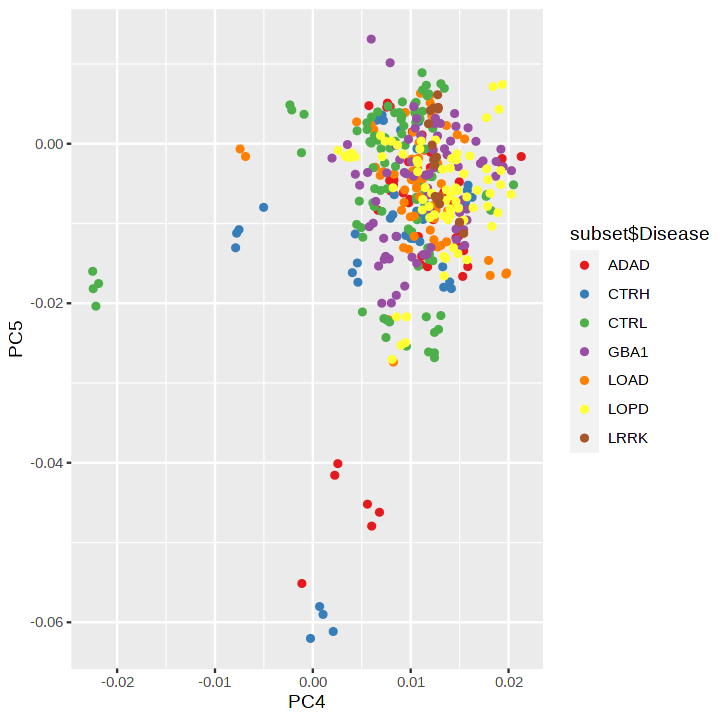

In [25]:
ggplot(data=subset,
      aes(x=subset$PC4,
          y=subset$PC5,
         color=subset$Disease))+
geom_point()+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999'))+
xlab("PC4")+
ylab("PC5")